#  BRAIN TUMOR DETECTION USING MRI IMAGES:
**Name: Abhishek Sarewar**
**Sec: B**
**University Roll_no: 2013220**

# Important Libraries Required for Data Analysis & Visualisation

In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Check whether keras is installed or not.....
!pip install -q keras

In [ ]:

# This Google Colab environment comes with many helpful analytics libraries installed
# Data_Set being used : https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

# Input data files are available in the read-only "content/drive/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under /drive/ directory
from google.colab import drive
drive.mount('/content/drive') #this will mount the google drive data required for data_set processing. 

#import os
#for dirname, _, filenames in os.walk('/content/drive'):
 #    for filename in filenames:
  #      print(os.path.join(dirname, filename))


Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Brain-Tumor-Detection-CNN")

In [ ]:
os.listdir()

['brain_tumor_dataset', 'BRAIN_TUMOR_DETECTION-cnn.ipynb']

In [ ]:
# One hot encoding the target classes i.e [0],[1]
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

# Reading, and Pre-Processing Dataset

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r"/content/drive/MyDrive/Brain-Tumor-Detection-CNN/brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
       # result[0]        

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Brain-Tumor-Detection-CNN/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)
result.shape

(139, 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

**Building Model**

In [ ]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#2nd convolution layer
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# COMPILING MODEL
model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

**Compiling and Training Model**

In [ ]:
x_train.shape

(111, 128, 128, 3)

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train,
                   epochs = 50,
                   batch_size = 40,
                   verbose = 1,
                   validation_data = (x_test, y_test))

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 60.5084 - val_loss: 8.1211
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 16.3910 - val_loss: 38.7312
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 16.7765 - val_loss: 21.6398
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 4.8968 - val_loss: 3.9439
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 4.0983 - val_loss: 2.0080
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 6.0095 - val_loss: 6.1194
Epoch 7/50
3/3 [==============================] - 6s 2s/step - loss: 0.8783 - val_loss: 13.2664
Epoch 8/50
3/3 [==============================] - 6s 2s/step - loss: 0.7736 - val_loss: 15.7252
Epoch 9/50
3/3 [==============================] - 6s 2s/step - loss: 2.2111 - val_loss: 14.0029
Epoch 10/50
3/3 [==============================] - 6s 2s/step - loss: 0.6238 - val_loss: 10.9068
Epoch 11/50
3/3 [=======================

**PLOTTING GRAPH**

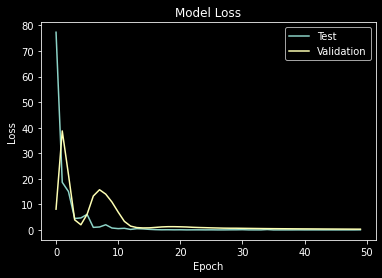

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

**Showing Result whether petient have Tumor or not**

99.98395442962646% Confidence This Is Its a Tumor


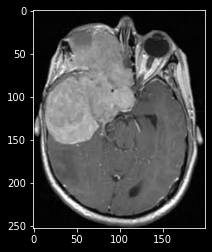

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain-Tumor-Detection-CNN/brain_tumor_dataset/yes/Y106.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99852180480957% Confidence This Is No, Its not a tumor


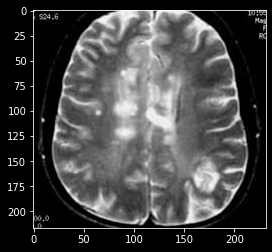

In [ ]:
img = Image.open(r"/content/drive/MyDrive/Brain-Tumor-Detection-CNN/brain_tumor_dataset/no/15 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

**Save Model**

In [ ]:
#SAVING TRAINED MODEL FOR DEPLOYMENT IN OUR LOCAL MACHINE USING FLASK
m_json = model.to_json()  
with open("MODEL.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("VGG_model1.h5") 
# now go to .py file for model deployment process